# Introduction

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import os
os.environ['OMP_NUM_THREADS'] = '3'
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
#Loading the final cleaned datasets

merged_file_df = pd.read_TYPE('Merged_File')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Tokenization

In [ ]:
print(merged_file_df['Exam_Notes'].dtype)
merged_file_df['Image_Info'] = merged_file_df['Image_Info'].astype(str)

object


In [ ]:
# Convert Exam_Notes column to lowercase
merged_file_df['Exam_Notes_lower'] = [note.lower() for note in merged_file_df['Exam_Notes'].tolist()]
merged_file_df['Image_Info_lower'] = [note.lower() for note in merged_file_df['Image_Info'].tolist()]

In [ ]:
# Tokenize the values in 'Exam_Notes' column
merged_file_df['Exam_Notes_tokens'] = merged_file_df['Exam_Notes_lower'].apply(lambda x: word_tokenize(x))

# Tokenize the values in 'Image_Info' column
merged_file_df['Image_Info_tokens'] = merged_file_df['Image_Info_lower'].apply(lambda x: word_tokenize(x))

In [ ]:
merged_file_df

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Step 2: Preprocess the text
# You may need to implement text preprocessing steps based on your specific requirements

# Step 3: Feature extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(merged_file_df['Exam_Notes'])
y = merged_file_df['Disease_Severity']


In [ ]:

# Step 4: Train a classification model
model = LogisticRegression()
model.fit(X, y)



LogisticRegression()

In [ ]:
# Step 6: Rank words by importance
feature_importance = model.coef_[0]

feature_names = vectorizer.get_feature_names_out()
word_importance = dict(zip(feature_names, feature_importance))
sorted_words = sorted(word_importance.items(), key=lambda x: x[1], reverse=True)


In [ ]:
word_importance

In [ ]:
# Step 7: Use the importance scores
# Assign higher numerical values to words responsible for classifying Active IBD
for word, importance in sorted_words:
    if importance > 0:
        print(f"Word: {word}, Importance: {importance}")
        # Apply the importance score to new exam notes accordingly

Word: repeat, Importance: 1.4353793325870723
Word: colonoscopy, Importance: 1.332060657864859
Word: normal, Importance: 1.2174061440960282
Word: colon, Importance: 0.9419876383859783
Word: hemorrhoids, Importance: 0.9358914637393714
Word: high, Importance: 0.8934274815414912
Word: surveillance, Importance: 0.8775168577060309
Word: scar, Importance: 0.7452091797698533
Word: telephone, Importance: 0.739067041388822
Word: gi, Importance: 0.7298854479216101
Word: background, Importance: 0.7283524432294332
Word: followup, Importance: 0.7187348857978393
Word: complete, Importance: 0.7146566691865123
Word: risk, Importance: 0.6567585249816631
Word: tests, Importance: 0.6303474144332238
Word: none, Importance: 0.6121083918242225
Word: specimens, Importance: 0.5931871540378404
Word: ec760rvl, Importance: 0.5486611401753334
Word: polyp, Importance: 0.54264757271871
Word: biopsies, Importance: 0.5341941271528733
Word: 4c729g463, Importance: 0.5339978597916178
Word: pain, Importance: 0.52711519749

In [ ]:
# Step 7: Use the importance scores
# Assign higher numerical values to words responsible for classifying Active IBD
important_words = [word for word, importance in sorted_words if importance > 0]



In [ ]:
# Apply the importance scores to new exam notes
new_exam_notes = ["Your new exam note 1", "Your new exam note 2", ...]  # Replace with actual new exam notes



In [ ]:
# Method 1: Multiply TF-IDF values by importance scores
new_X = vectorizer.transform(new_exam_notes)
new_X_with_importance = new_X.multiply(feature_importance)



In [ ]:
# Method 2: Use importance scores as weights in a weighted classification model
# Apply the weights to the existing model
weighted_model = LogisticRegression()
weighted_model.coef_ = model.coef_ * feature_importance



In [ ]:
# Classify new exam notes using the weighted model
predictions = weighted_model.predict(new_X)

# Print the ranked words by importance
for word, importance in sorted_words:
    print(f"Word: {word}, Importance: {importance}")

# Print the classification predictions for new exam notes
for note, prediction in zip(new_exam_notes, predictions):
    print(f"Exam Note: {note}, Prediction: {prediction}")

## Vectorization

In [ ]:
def BagOfWordsVectorization(columns,newColumn):
    # Get the tokenized text from the DataFrame
    tokenized_text = merged_file_df[columns]

    # Convert tokenized text back to strings
    preprocessed_text = [' '.join(tokens) for tokens in tokenized_text]

    # Create an instance of CountVectorizer
    vectorizer = CountVectorizer()
    # Fit the vectorizer on the preprocessed text and transform it
    vectorized_data = vectorizer.fit_transform(preprocessed_text).toarray()

    # Create a new column in the DataFrame with the vectorized data
    merged_file_df[newColumn] = pd.Series(vectorized_data.tolist())

In [ ]:
def NGramVectorization(columns,newColumn):
    # Get the tokenized text from the DataFrame
    tokenized_text = merged_file_df[columns]

    # Convert tokenized text back to strings
    preprocessed_text = [' '.join(tokens) for tokens in tokenized_text]

    # Create an instance of TfidfVectorizer
    vectorizer = TfidfVectorizer(ngram_range=(1, 1))
    # Fit the vectorizer on the preprocessed text and transform it
    vectorized_data = vectorizer.fit_transform(preprocessed_text).toarray()

    # Create a new column in the DataFrame with the vectorized data
    merged_file_df[newColumn] = pd.Series(vectorized_data.tolist())


In [ ]:
merged_file_df

In [ ]:
NGramVectorization('Exam_Notes_tokens','Exam_Notes_vectorized')
NGramVectorization('Image_Info_tokens','ImageInfo_vectorized')

In [ ]:
merged_file_df = merged_file_df.drop(['Exam_ID','Exam_Notes','Exam_Notes_tokens','Image_Info_tokens','Image_Info'],axis=1)

## Encoding categeorical variables

In [ ]:
merged_file_df["Disease_Severity"] = merged_file_df["Disease_Severity"].apply(lambda x: 1 if x == "Active" else 0)
merged_file_df["Ulcer"] = merged_file_df["Ulcer"].apply(lambda x: 1 if x == "Yes" else 0)

In [ ]:
merged_file_df

In [ ]:
merged_file_df = merged_file_df.drop(['Exam_Notes_lower','Image_Info_lower'],axis=1)

In [ ]:
merged_file_df

# Clustering

In this we are passing all the other vectors Exam_Notes_vectorized,ImageInfo_vectorized,Ulcer to kmeans and try to fit the columns

In [ ]:
exam_notes_vectors = merged_file_df['Exam_Notes_vectorized'].tolist()
image_info_vectors = merged_file_df['ImageInfo_vectorized'].tolist()
Ulcer = merged_file_df["Ulcer"].values.reshape(-1, 1)
feature_vectors = np.concatenate((exam_notes_vectors, image_info_vectors, Ulcer), axis=1)

kmeans = KMeans(n_clusters=2, random_state=0,n_init=10)
kmeans.fit(feature_vectors)
# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
merged_file_df['Cluster'] = cluster_labels

# Display the updated DataFrame
merged_file_df

In [ ]:
# Create the cross-tabulation
cross_tab = pd.crosstab(merged_file_df['Disease_Severity'], merged_file_df['Cluster'])

# Print the cross-tabulation
print(cross_tab)

Cluster             0    1
Disease_Severity          
0                 309   51
1                  79  289


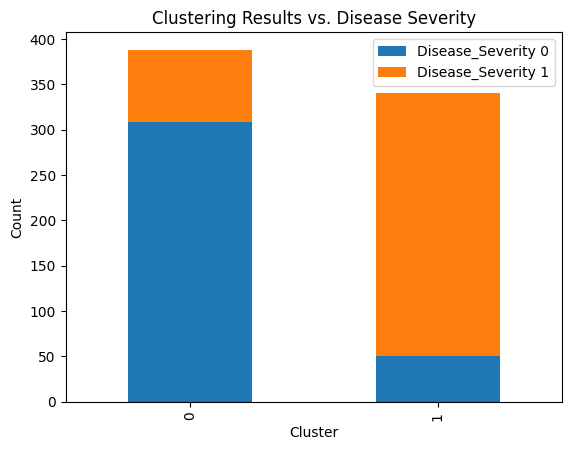

In [ ]:
import matplotlib.pyplot as plt

# Calculate the count of Disease_Severity in each cluster
cluster_counts = merged_file_df.groupby(['Cluster', 'Disease_Severity']).size().unstack()

# Create the grouped bar plot
cluster_counts.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Clustering Results vs. Disease Severity')
plt.legend(['Disease_Severity 0', 'Disease_Severity 1'])
plt.show()

In [ ]:
# Assign labels to clusters based on majority class of Disease_Severity
cluster_labels = merged_file_df.groupby('Cluster')['Disease_Severity'].agg(lambda x: x.value_counts().idxmax())

# Create a mapping dictionary for cluster labels
label_mapping = dict(zip(cluster_labels.index, cluster_labels))

# Map the cluster labels to the actual Disease_Severity labels
predicted_labels = merged_file_df['Cluster'].map(label_mapping)

# Calculate the accuracy
accuracy = (predicted_labels == merged_file_df['Disease_Severity']).mean()

print("Accuracy:", accuracy)

Accuracy: 0.8214285714285714
